In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
!pip install nltk

In [3]:
df=pd.read_csv("callsf0d4f5a.csv")

In [5]:
df

,call_id,customer_id,agent_id,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript
0,4667960400,2033123310,963118,7/31/2024 23:56,8/1/2024 0:03,8/1/2024 0:34,\n\nAgent: Thank you for calling United Airlin...
1,1122072124,8186702651,519057,8/1/2024 0:03,8/1/2024 0:06,8/1/2024 0:18,\n\nAgent: Thank you for calling United Airlin...
2,6834291559,2416856629,158319,7/31/2024 23:59,8/1/2024 0:07,8/1/2024 0:26,\n\nAgent: Thank you for calling United Airlin...
3,2266439882,1154544516,488324,8/1/2024 0:05,8/1/2024 0:10,8/1/2024 0:17,\n\nAgent: Thank you for calling United Airlin...
4,1211603231,5214456437,721730,8/1/2024 0:04,8/1/2024 0:14,8/1/2024 0:23,\n\nAgent: Thank you for calling United Airlin...
...,...,...,...,...,...,...,...
71805,1563273072,8022667294,413148,8/31/2024 23:48,8/31/2024 23:57,9/1/2024 0:25,\n\nAgent: Thank you for calling United Airlin...
71806,8865997781,4474867021,980156,8/31/2024 23:55,8/31/2024 23:58,9/1/2024 0:06,\n\nAgent: Thank you for calling United Airlin...
71807,8019240181,9762042472,616988,8/31/2024 23:52,8/31/2024 23:58,9/1/2024 0:04,\n\nAgent: Thank you for calling United Airlin...
71808,8332067080,8095620266,161354,8/31/2024 23:53,8/31/2024 23:59,9/1/2024 0:03,\n\nAgent: Thank you for calling United Airlin...


In [6]:
df['call_start_datetime'] = pd.to_datetime(df['call_start_datetime'])
df['call_end_datetime'] = pd.to_datetime(df['call_end_datetime'])
df['agent_assigned_datetime']=pd.to_datetime(df['agent_assigned_datetime'])

In [7]:
df['call_duration'] = (df['call_end_datetime'] - df['call_start_datetime']).dt.total_seconds() / 60

In [8]:
df['AHT'] = (df["call_end_datetime"]-df['agent_assigned_datetime']).dt.total_seconds() / 60

In [9]:
df['agent_assign_duration']=(df['agent_assigned_datetime']-df['call_start_datetime']).dt.total_seconds() / 60

In [37]:
df_cleaned

,level_0,index,call_id,customer_id,agent_id,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,call_duration,transcript_complete,cleaned_transcript,hour,day_of_week,primary_call_reason
1,1,15,3313876732,6748767796,158319,2024-08-01 00:32:00,8/1/2024 0:40,2024-08-01 01:13:00,\n\nAgent: Thank you for calling United Airlin...,41.0,Thank you for calling United Airlines customer...,thank calling united airlines customer service...,0,Thursday,Check In
2,2,16,9009313118,1937394483,963118,2024-08-01 00:38:00,8/1/2024 0:47,2024-08-01 01:31:00,\n\nAgent: Thank you for calling United Airlin...,53.0,"Thank you for calling United Airlines, my name...",thank calling united airlines name james help ...,0,Thursday,Post Flight
3,3,34,3107888571,6813371451,519057,2024-08-01 01:37:00,8/1/2024 1:43,2024-08-01 02:21:00,\n\nAgent: Thank you for calling United Airlin...,44.0,Thank you for calling United Airlines customer...,thank calling united airlines customer service...,1,Thursday,Mileage Plus
4,4,79,5725811355,1773534882,158319,2024-08-01 04:00:00,8/1/2024 4:04,2024-08-01 04:46:00,\n\nAgent: Thank you for calling United Airlin...,46.0,"Thank you for calling United Airlines, my name...",thank calling united airlines name alex may he...,4,Thursday,Schedule Change
5,5,87,3494281557,3732525410,964561,2024-08-01 04:36:00,8/1/2024 4:45,2024-08-01 05:31:00,\n\nAgent: Thank you for calling United Airlin...,55.0,Thank you for calling United Airlines customer...,thank calling united airlines customer service...,4,Thursday,Seating
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5168,5168,71735,9012625201,4110984748,336455,2024-08-31 22:40:00,8/31/2024 22:49,2024-08-31 23:52:00,\n\nAgent: Thank you for calling United Airlin...,72.0,"Thank you for calling United Airlines, my name...",thank calling united airlines name steve help ...,22,Saturday,Post Flight
5170,5170,71752,3504075766,2324618148,780490,2024-08-31 22:59:00,8/31/2024 23:08,2024-08-31 23:47:00,\n\nAgent: Thank you for calling United Airlin...,48.0,Thank you for calling United Airlines customer...,thank calling united airlines customer service...,22,Saturday,Checkout
5171,5171,71770,8727725650,4295424012,506130,2024-08-31 23:14:00,8/31/2024 23:21,2024-09-01 00:09:00,\n\nAgent: Thank you for calling United Airlin...,55.0,Thank you for calling United Airlines customer...,thank calling united airlines customer service...,23,Saturday,Voluntary Cancel
5172,5172,71785,5713760779,3306855958,102574,2024-08-31 23:29:00,8/31/2024 23:38,2024-09-01 01:33:00,\n\nAgent: Thank you for calling United Airlin...,124.0,"Thank you for calling United Airlines, this is...",thank calling united airlines adam speaking ma...,23,Saturday,Post Flight


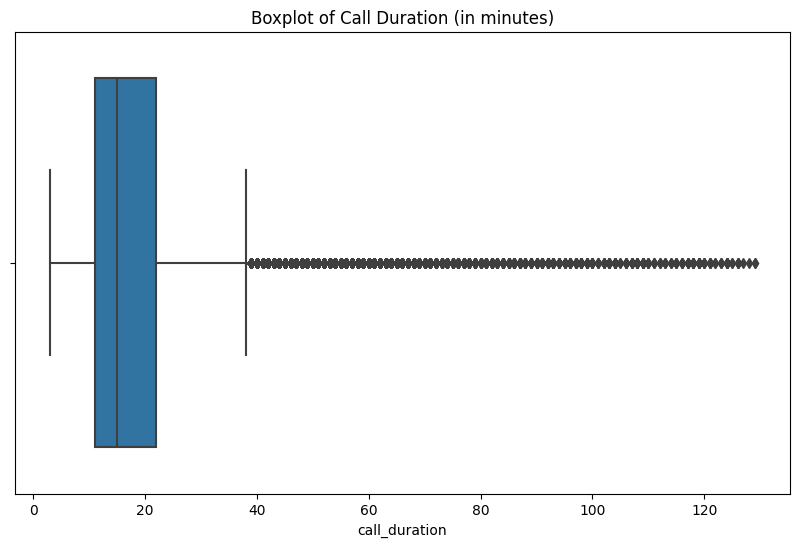

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the boxplot for call duration to detect outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['call_duration'])
plt.title("Boxplot of Call Duration (in minutes)")
plt.show()

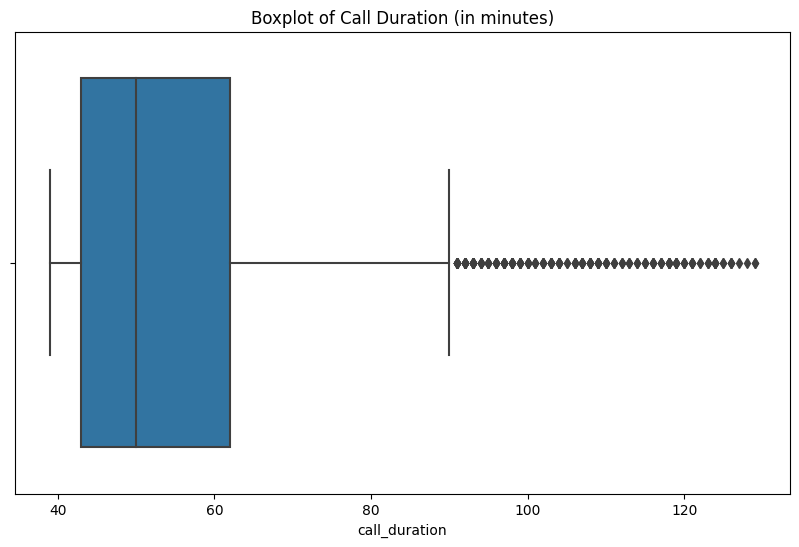

In [11]:
Q1 = df['call_duration'].quantile(0.25)
Q3 = df['call_duration'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
outliers = df[(df['call_duration'] >= lower_bound) & (df['call_duration'] <= upper_bound)]
df=df.drop(outliers.index,axis=0)

plt.figure(figsize=(10, 6))
sns.boxplot(x=df['call_duration'])
plt.title("Boxplot of Call Duration (in minutes)")
plt.show()

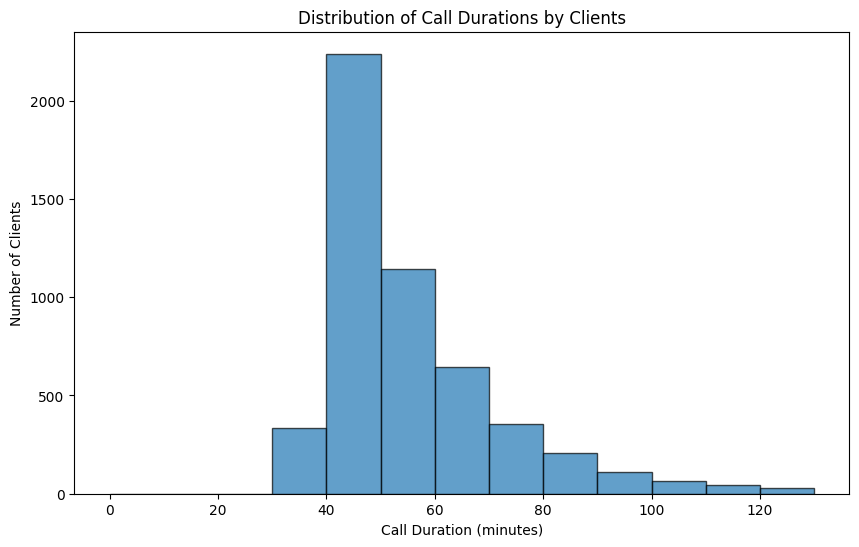

In [12]:
import matplotlib.pyplot as plt

# Define the bin edges for the ranges of interest (e.g., 0-10, 10-20, 20-30 minutes)
bins = range(0, int(df['call_duration'].max()) + 10, 10)

# Plot the histogram of call durations
plt.figure(figsize=(10, 6))
plt.hist(df['call_duration'], bins=bins, edgecolor='black', alpha=0.7)

# Add labels and title
plt.xlabel('Call Duration (minutes)')
plt.ylabel('Number of Clients')
plt.title('Distribution of Call Durations by Clients')

# Display the plot
plt.show()

In [42]:
df

,level_0,index,call_id,customer_id,agent_id,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,call_duration,transcript_complete,cleaned_transcript,hour,day_of_week,agent_assign_duration
0,0,11,7732610078,4029953261,488324,2024-08-01 00:23:00,2024-08-01 00:34:00,2024-08-01 01:32:00,\n\nAgent: Thank you for calling United Airlin...,69.0,Thank you for calling United Airlines customer...,thank calling united airlines customer service...,0,Thursday,-11.0
1,1,15,3313876732,6748767796,158319,2024-08-01 00:32:00,2024-08-01 00:40:00,2024-08-01 01:13:00,\n\nAgent: Thank you for calling United Airlin...,41.0,Thank you for calling United Airlines customer...,thank calling united airlines customer service...,0,Thursday,-8.0
2,2,16,9009313118,1937394483,963118,2024-08-01 00:38:00,2024-08-01 00:47:00,2024-08-01 01:31:00,\n\nAgent: Thank you for calling United Airlin...,53.0,"Thank you for calling United Airlines, my name...",thank calling united airlines name james help ...,0,Thursday,-9.0
3,3,34,3107888571,6813371451,519057,2024-08-01 01:37:00,2024-08-01 01:43:00,2024-08-01 02:21:00,\n\nAgent: Thank you for calling United Airlin...,44.0,Thank you for calling United Airlines customer...,thank calling united airlines customer service...,1,Thursday,-6.0
4,4,79,5725811355,1773534882,158319,2024-08-01 04:00:00,2024-08-01 04:04:00,2024-08-01 04:46:00,\n\nAgent: Thank you for calling United Airlin...,46.0,"Thank you for calling United Airlines, my name...",thank calling united airlines name alex may he...,4,Thursday,-4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5169,5169,71736,727694488,5500822696,859203,2024-08-31 22:43:00,2024-08-31 22:51:00,2024-08-31 23:54:00,\n\nAgent: Thank you for calling United Airlin...,71.0,"Thank you for calling United Airlines, my name...",thank calling united airlines name michael may...,22,Saturday,-8.0
5170,5170,71752,3504075766,2324618148,780490,2024-08-31 22:59:00,2024-08-31 23:08:00,2024-08-31 23:47:00,\n\nAgent: Thank you for calling United Airlin...,48.0,Thank you for calling United Airlines customer...,thank calling united airlines customer service...,22,Saturday,-9.0
5171,5171,71770,8727725650,4295424012,506130,2024-08-31 23:14:00,2024-08-31 23:21:00,2024-09-01 00:09:00,\n\nAgent: Thank you for calling United Airlin...,55.0,Thank you for calling United Airlines customer...,thank calling united airlines customer service...,23,Saturday,-7.0
5172,5172,71785,5713760779,3306855958,102574,2024-08-31 23:29:00,2024-08-31 23:38:00,2024-09-01 01:33:00,\n\nAgent: Thank you for calling United Airlin...,124.0,"Thank you for calling United Airlines, this is...",thank calling united airlines adam speaking ma...,23,Saturday,-9.0


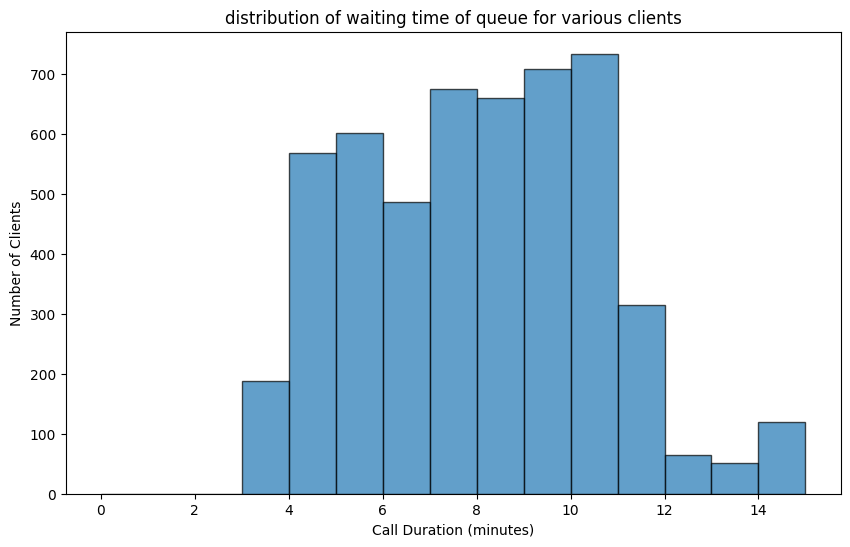

In [13]:
import matplotlib.pyplot as plt

# Define the bin edges for the ranges of interest (e.g., 0-10, 10-20, 20-30 minutes)
bins = range(0, int(df['agent_assign_duration'].max()) + 1, 1)

# Plot the histogram of call durations
plt.figure(figsize=(10, 6))
plt.hist(df['agent_assign_duration'], bins=bins, edgecolor='black', alpha=0.7)

# Add labels and title
plt.xlabel('Call Duration (minutes)')
plt.ylabel('Number of Clients')
plt.title('distribution of waiting time of queue for various clients')

# Display the plot
plt.show()

In [14]:
df2=pd.read_csv("customers2afd6ea.csv")

In [15]:
df3=pd.read_csv("reason18315ff.csv")

In [16]:
Average_Handle_Time_per_agent = df.groupby('agent_id')['AHT'].mean().reset_index()

In [17]:
Average_Speed_Time_of_assigning_agent = df.groupby('agent_id')['agent_assign_duration'].mean().reset_index()

In [18]:
Average_Handle_Time_per_agent

,agent_id,AHT
0,102574,115.000000
1,103651,46.333333
2,106000,46.125000
3,107876,34.000000
4,112609,72.000000
...,...,...
347,981776,48.080000
348,981779,47.375000
349,982131,45.545455
350,992521,56.400000


In [19]:
Average_Speed_Time_of_assigning_agent = df.groupby('agent_id')['agent_assign_duration'].mean().reset_index()
Average_Speed_Time_of_assigning_agent

,agent_id,agent_assign_duration
0,102574,9.000000
1,103651,7.407407
2,106000,7.500000
3,107876,11.000000
4,112609,4.000000
...,...,...
347,981776,7.880000
348,981779,8.312500
349,982131,6.954545
350,992521,9.000000


In [21]:
from matplotlib import pyplot as plt
Average_Handle_Time_per_agent['call_duration'].plot(kind='line', figsize=(8, 4), title='Average Handle Time')
plt.gca().spines[['top', 'right']].set_visible(False)

KeyError: 'call_duration'

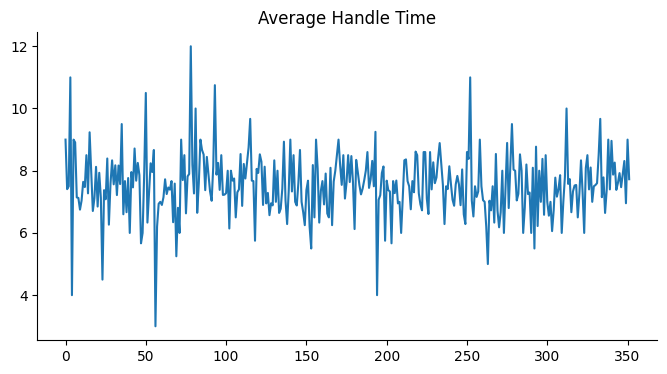

In [50]:
from matplotlib import pyplot as plt
Average_Speed_Time['agent_assign_duration'].plot(kind='line', figsize=(8, 4), title='Average Handle Time')
plt.gca().spines[['top', 'right']].set_visible(False)

In [22]:
df.reset_index(inplace=True)
df

,index,call_id,customer_id,agent_id,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,call_duration,AHT,agent_assign_duration
0,11,7732610078,4029953261,488324,2024-08-01 00:23:00,2024-08-01 00:34:00,2024-08-01 01:32:00,\n\nAgent: Thank you for calling United Airlin...,69.0,58.0,11.0
1,15,3313876732,6748767796,158319,2024-08-01 00:32:00,2024-08-01 00:40:00,2024-08-01 01:13:00,\n\nAgent: Thank you for calling United Airlin...,41.0,33.0,8.0
2,16,9009313118,1937394483,963118,2024-08-01 00:38:00,2024-08-01 00:47:00,2024-08-01 01:31:00,\n\nAgent: Thank you for calling United Airlin...,53.0,44.0,9.0
3,34,3107888571,6813371451,519057,2024-08-01 01:37:00,2024-08-01 01:43:00,2024-08-01 02:21:00,\n\nAgent: Thank you for calling United Airlin...,44.0,38.0,6.0
4,79,5725811355,1773534882,158319,2024-08-01 04:00:00,2024-08-01 04:04:00,2024-08-01 04:46:00,\n\nAgent: Thank you for calling United Airlin...,46.0,42.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...
5169,71736,727694488,5500822696,859203,2024-08-31 22:43:00,2024-08-31 22:51:00,2024-08-31 23:54:00,\n\nAgent: Thank you for calling United Airlin...,71.0,63.0,8.0
5170,71752,3504075766,2324618148,780490,2024-08-31 22:59:00,2024-08-31 23:08:00,2024-08-31 23:47:00,\n\nAgent: Thank you for calling United Airlin...,48.0,39.0,9.0
5171,71770,8727725650,4295424012,506130,2024-08-31 23:14:00,2024-08-31 23:21:00,2024-09-01 00:09:00,\n\nAgent: Thank you for calling United Airlin...,55.0,48.0,7.0
5172,71785,5713760779,3306855958,102574,2024-08-31 23:29:00,2024-08-31 23:38:00,2024-09-01 01:33:00,\n\nAgent: Thank you for calling United Airlin...,124.0,115.0,9.0


In [23]:
df["call_transcript"].apply(lambda x:len(str(x).split()))[0]

384

In [24]:
def clean_transcript(text):
    text = text.replace('Agent:', '').replace('Customer:', '')
    return text.strip()

# Apply the function to the 'transcript' column
df['transcript_complete'] = df['call_transcript'].apply(clean_transcript)

# Display the cleaned transcripts
df[['call_transcript', 'transcript_complete']].head()

,call_transcript,transcript_complete
0,\n\nAgent: Thank you for calling United Airlin...,Thank you for calling United Airlines customer...
1,\n\nAgent: Thank you for calling United Airlin...,Thank you for calling United Airlines customer...
2,\n\nAgent: Thank you for calling United Airlin...,"Thank you for calling United Airlines, my name..."
3,\n\nAgent: Thank you for calling United Airlin...,Thank you for calling United Airlines customer...
4,\n\nAgent: Thank you for calling United Airlin...,"Thank you for calling United Airlines, my name..."


In [25]:
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
import re

# Download stopwords from nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Function to clean the transcripts
def preprocess_transcript(text):
    # Remove special characters, numbers, and lower the text
    text = re.sub(r'[^a-zA-Z]', ' ', text.lower())
    
    # Tokenize and remove stopwords
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    
    return ' '.join(tokens)

# Apply the preprocessing function to the 'transcript' column
df['cleaned_transcript'] = df['transcript_complete'].apply(preprocess_transcript)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [26]:
df['cleaned_transcript']


0       thank calling united airlines customer service...
1       thank calling united airlines customer service...
2       thank calling united airlines name james help ...
3       thank calling united airlines customer service...
4       thank calling united airlines name alex may he...
                              ...                        
5169    thank calling united airlines name michael may...
5170    thank calling united airlines customer service...
5171    thank calling united airlines customer service...
5172    thank calling united airlines adam speaking ma...
5173    thank calling united airlines name sarah help ...
Name: cleaned_transcript, Length: 5174, dtype: object

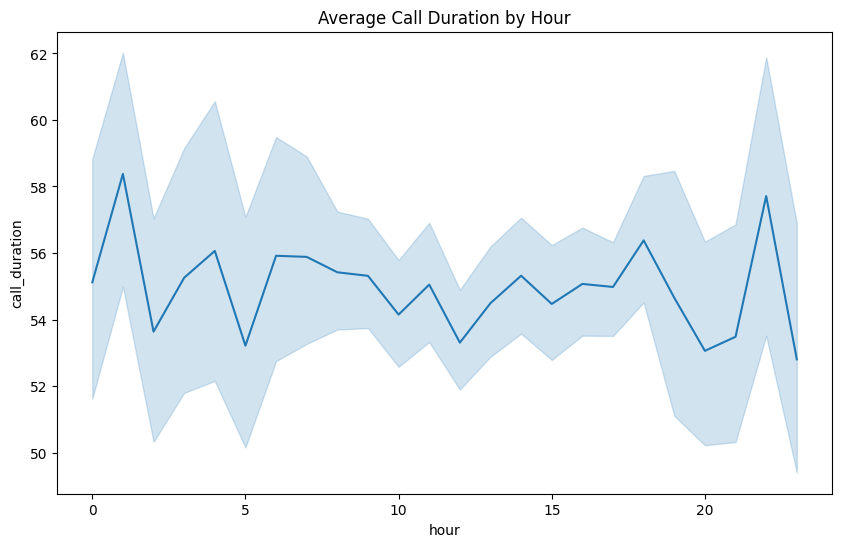

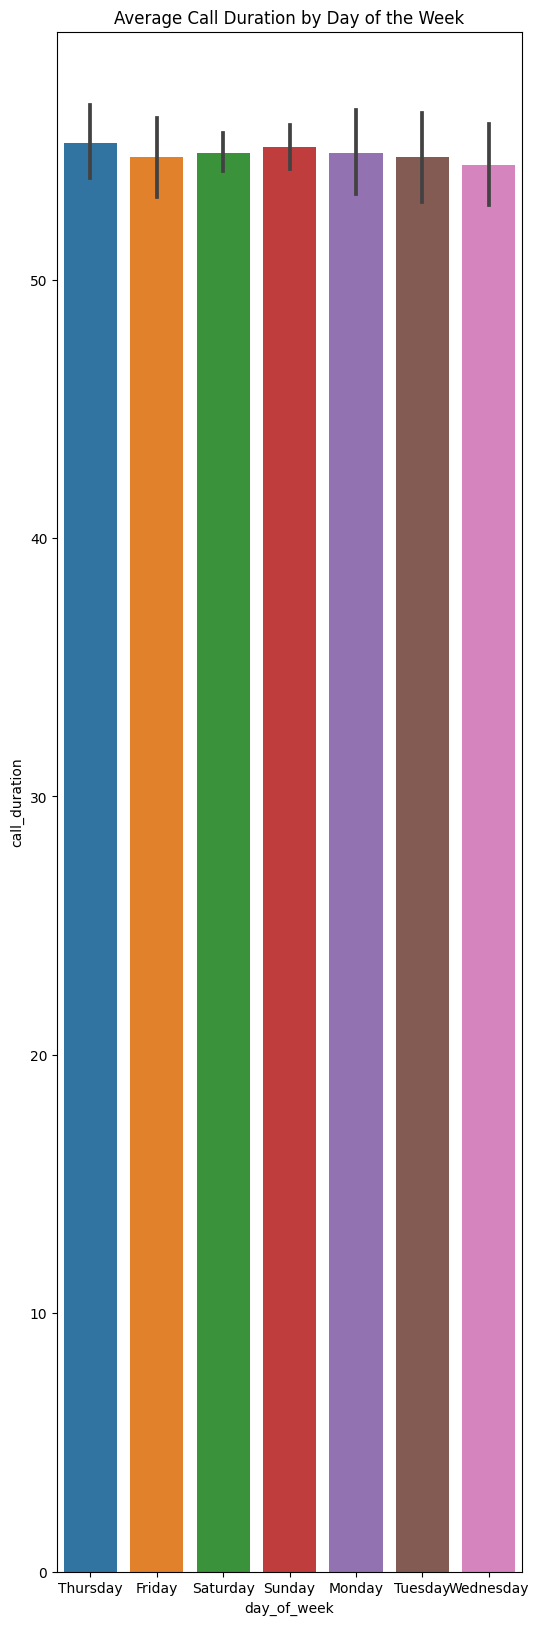

In [27]:
df['hour'] = df['call_start_datetime'].dt.hour
df['day_of_week'] = df['call_start_datetime'].dt.day_name()

# Plot average call duration by hour
plt.figure(figsize=(10, 6))
sns.lineplot(x='hour', y='call_duration', data=df)
plt.title('Average Call Duration by Hour')
plt.show()

# Plot average call duration by day of the week
plt.figure(figsize=(6, 20))
sns.barplot(x='day_of_week', y='call_duration', data=df)
plt.title('Average Call Duration by Day of the Week')
plt.show()

In [28]:
df_merge = df.merge(df3[['call_id', 'primary_call_reason']], on='call_id', how='left')

In [29]:
df_merge

,index,call_id,customer_id,agent_id,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,call_duration,AHT,agent_assign_duration,transcript_complete,cleaned_transcript,hour,day_of_week,primary_call_reason
0,11,7732610078,4029953261,488324,2024-08-01 00:23:00,2024-08-01 00:34:00,2024-08-01 01:32:00,\n\nAgent: Thank you for calling United Airlin...,69.0,58.0,11.0,Thank you for calling United Airlines customer...,thank calling united airlines customer service...,0,Thursday,NaN
1,15,3313876732,6748767796,158319,2024-08-01 00:32:00,2024-08-01 00:40:00,2024-08-01 01:13:00,\n\nAgent: Thank you for calling United Airlin...,41.0,33.0,8.0,Thank you for calling United Airlines customer...,thank calling united airlines customer service...,0,Thursday,Check In
2,16,9009313118,1937394483,963118,2024-08-01 00:38:00,2024-08-01 00:47:00,2024-08-01 01:31:00,\n\nAgent: Thank you for calling United Airlin...,53.0,44.0,9.0,"Thank you for calling United Airlines, my name...",thank calling united airlines name james help ...,0,Thursday,Post Flight
3,34,3107888571,6813371451,519057,2024-08-01 01:37:00,2024-08-01 01:43:00,2024-08-01 02:21:00,\n\nAgent: Thank you for calling United Airlin...,44.0,38.0,6.0,Thank you for calling United Airlines customer...,thank calling united airlines customer service...,1,Thursday,Mileage Plus
4,79,5725811355,1773534882,158319,2024-08-01 04:00:00,2024-08-01 04:04:00,2024-08-01 04:46:00,\n\nAgent: Thank you for calling United Airlin...,46.0,42.0,4.0,"Thank you for calling United Airlines, my name...",thank calling united airlines name alex may he...,4,Thursday,Schedule Change
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5169,71736,727694488,5500822696,859203,2024-08-31 22:43:00,2024-08-31 22:51:00,2024-08-31 23:54:00,\n\nAgent: Thank you for calling United Airlin...,71.0,63.0,8.0,"Thank you for calling United Airlines, my name...",thank calling united airlines name michael may...,22,Saturday,NaN
5170,71752,3504075766,2324618148,780490,2024-08-31 22:59:00,2024-08-31 23:08:00,2024-08-31 23:47:00,\n\nAgent: Thank you for calling United Airlin...,48.0,39.0,9.0,Thank you for calling United Airlines customer...,thank calling united airlines customer service...,22,Saturday,Checkout
5171,71770,8727725650,4295424012,506130,2024-08-31 23:14:00,2024-08-31 23:21:00,2024-09-01 00:09:00,\n\nAgent: Thank you for calling United Airlin...,55.0,48.0,7.0,Thank you for calling United Airlines customer...,thank calling united airlines customer service...,23,Saturday,Voluntary Cancel
5172,71785,5713760779,3306855958,102574,2024-08-31 23:29:00,2024-08-31 23:38:00,2024-09-01 01:33:00,\n\nAgent: Thank you for calling United Airlin...,124.0,115.0,9.0,"Thank you for calling United Airlines, this is...",thank calling united airlines adam speaking ma...,23,Saturday,Post Flight


In [30]:
df_cleaned=df_merge.dropna(subset=["primary_call_reason"])
df_cleaned

,index,call_id,customer_id,agent_id,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,call_duration,AHT,agent_assign_duration,transcript_complete,cleaned_transcript,hour,day_of_week,primary_call_reason
1,15,3313876732,6748767796,158319,2024-08-01 00:32:00,2024-08-01 00:40:00,2024-08-01 01:13:00,\n\nAgent: Thank you for calling United Airlin...,41.0,33.0,8.0,Thank you for calling United Airlines customer...,thank calling united airlines customer service...,0,Thursday,Check In
2,16,9009313118,1937394483,963118,2024-08-01 00:38:00,2024-08-01 00:47:00,2024-08-01 01:31:00,\n\nAgent: Thank you for calling United Airlin...,53.0,44.0,9.0,"Thank you for calling United Airlines, my name...",thank calling united airlines name james help ...,0,Thursday,Post Flight
3,34,3107888571,6813371451,519057,2024-08-01 01:37:00,2024-08-01 01:43:00,2024-08-01 02:21:00,\n\nAgent: Thank you for calling United Airlin...,44.0,38.0,6.0,Thank you for calling United Airlines customer...,thank calling united airlines customer service...,1,Thursday,Mileage Plus
4,79,5725811355,1773534882,158319,2024-08-01 04:00:00,2024-08-01 04:04:00,2024-08-01 04:46:00,\n\nAgent: Thank you for calling United Airlin...,46.0,42.0,4.0,"Thank you for calling United Airlines, my name...",thank calling united airlines name alex may he...,4,Thursday,Schedule Change
5,87,3494281557,3732525410,964561,2024-08-01 04:36:00,2024-08-01 04:45:00,2024-08-01 05:31:00,\n\nAgent: Thank you for calling United Airlin...,55.0,46.0,9.0,Thank you for calling United Airlines customer...,thank calling united airlines customer service...,4,Thursday,Seating
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5168,71735,9012625201,4110984748,336455,2024-08-31 22:40:00,2024-08-31 22:49:00,2024-08-31 23:52:00,\n\nAgent: Thank you for calling United Airlin...,72.0,63.0,9.0,"Thank you for calling United Airlines, my name...",thank calling united airlines name steve help ...,22,Saturday,Post Flight
5170,71752,3504075766,2324618148,780490,2024-08-31 22:59:00,2024-08-31 23:08:00,2024-08-31 23:47:00,\n\nAgent: Thank you for calling United Airlin...,48.0,39.0,9.0,Thank you for calling United Airlines customer...,thank calling united airlines customer service...,22,Saturday,Checkout
5171,71770,8727725650,4295424012,506130,2024-08-31 23:14:00,2024-08-31 23:21:00,2024-09-01 00:09:00,\n\nAgent: Thank you for calling United Airlin...,55.0,48.0,7.0,Thank you for calling United Airlines customer...,thank calling united airlines customer service...,23,Saturday,Voluntary Cancel
5172,71785,5713760779,3306855958,102574,2024-08-31 23:29:00,2024-08-31 23:38:00,2024-09-01 01:33:00,\n\nAgent: Thank you for calling United Airlin...,124.0,115.0,9.0,"Thank you for calling United Airlines, this is...",thank calling united airlines adam speaking ma...,23,Saturday,Post Flight


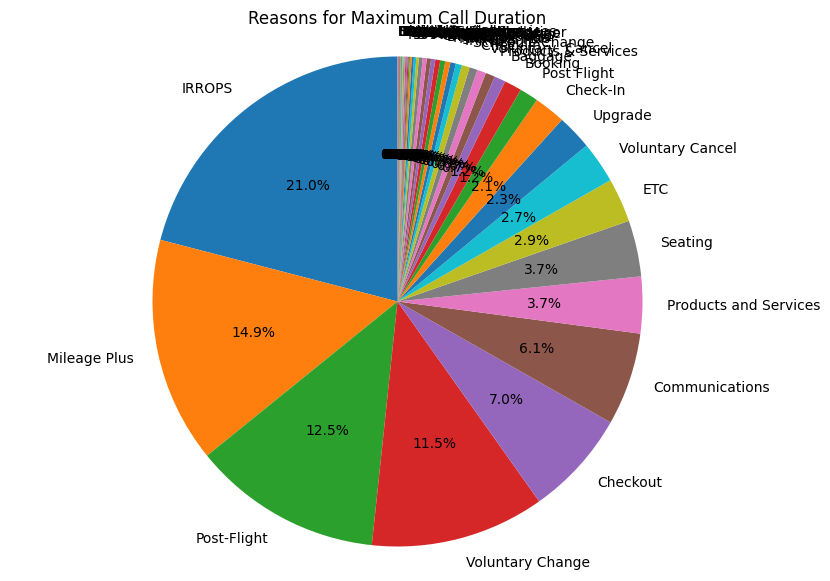

In [31]:
import matplotlib.pyplot as plt

# Group the data by 'primary_call_reason' and sum the call durations
reason_duration = df_cleaned.groupby('primary_call_reason')['call_duration'].sum()

# Sort by maximum duration to get the top reasons
reason_duration_sorted = reason_duration.sort_values(ascending=False)

# Plot a pie chart of the top reasons for call duration
plt.figure(figsize=(10, 7))
plt.pie(reason_duration_sorted, labels=reason_duration_sorted.index, autopct='%1.1f%%', startangle=90)
plt.title('Reasons for Maximum Call Duration')
plt.axis('equal')  # Ensures the pie chart is circular
plt.show()


In [106]:
a=df_cleaned[df_cleaned['primary_call_reason']=='voluntarycancel']
a['transcript_complete'][47]


"Thank you for calling United Airlines, this is John how can I help you?\n\n Hi, yeah I'm calling about my flight tomorrow from New York to San Francisco. It's been delayed like three times already and now it looks like it might get canceled. I really need to be in San Francisco for a meeting on Monday.\n\n I understand your frustration sir. Let me take a look at your booking details and see what options we have available. What's the flight number?\n\n It's flight 1965, it was originally supposed to leave at 8am but now it says 11am. I'm just worried it's not actually gonna happen. \n\n *typing noises* Okay, let me pull up your reservation. *pause* Yeah, I'm seeing the multiple delays on flight 1965. Unfortunately with the weather we've been having on the east coast, it has really been impacting our flight schedules. Let me check some other flight options to get you out earlier. Umm, it looks like we have some seats available on a 10am flight tomorrow that gets into SFO at 1pm, would t

In [32]:
df_cleaned['primary_call_reason'] = df_cleaned['primary_call_reason'].str.replace(' ', '', regex=True).str.replace('-', '', regex=True).str.lower()
grouped_reasons = df_cleaned.groupby('primary_call_reason')

# Display the size of each group (number of transcripts per reason)
call_reason_counts = grouped_reasons.size().sort_values(ascending=False)
print(call_reason_counts)



primary_call_reason
irrops                 1056
mileageplus             745
postflight              649
voluntarychange         615
checkout                348
communications          300
seating                 191
productsandservices     184
voluntarycancel         157
etc                     146
upgrade                 113
checkin                 111
booking                  56
baggage                  42
products&services        29
schedulechange           28
digitalsupport           21
travelerupdates          19
othertopics               7
unaccompaniedminor        4
disability                4
dtype: int64


C:\Users\HP\AppData\Local\Temp\ipykernel_27032\1410308057.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['primary_call_reason'] = df_cleaned['primary_call_reason'].str.replace(' ', '', regex=True).str.replace('-', '', regex=True).str.lower()


In [33]:
avg_duration_per_reason = grouped_reasons['call_duration'].mean().sort_values(ascending=False)

# Calculate total call duration for each call reason
total_duration_per_reason = grouped_reasons['call_duration'].sum().sort_values(ascending=False)

# Display the top reasons taking the longest time
print("Average Call Duration per Reason:")
print(avg_duration_per_reason)

print("\nTotal Call Duration per Reason:")
print(total_duration_per_reason)


Average Call Duration per Reason:
primary_call_reason
checkin                63.927928
voluntarycancel        57.375796
postflight             57.064715
products&services      57.000000
mileageplus            56.357047
booking                56.214286
etc                    55.719178
checkout               55.520115
communications         55.220000
upgrade                54.619469
productsandservices    54.548913
schedulechange         53.607143
irrops                 53.542614
seating                52.073298
voluntarychange        51.801626
unaccompaniedminor     51.500000
travelerupdates        51.052632
baggage                49.500000
digitalsupport         48.095238
othertopics            47.142857
disability             46.250000
Name: call_duration, dtype: float64

Total Call Duration per Reason:
primary_call_reason
irrops                 56541.0
mileageplus            41986.0
postflight             37035.0
voluntarychange        31858.0
checkout               19321.0
communica

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorize the transcript data (convert words into numerical features)
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X_tfidf = tfidf_vectorizer.fit_transform(df_cleaned['call_transcript'].fillna(''))

# Get feature names (words)
feature_names = tfidf_vectorizer.get_feature_names_out()

# Convert the TF-IDF matrix to a DataFrame
df_tfidf = pd.DataFrame(X_tfidf.toarray(), columns=feature_names)

# Get the most frequent words across all transcripts
top_words = df_tfidf.sum().sort_values(ascending=False).head(50)
print(top_words)

flight          879.175431
agent           790.090615
customer        789.249241
change          489.135788
let             444.800522
help            291.825386
like            283.546636
thank           270.321053
fee             252.921472
united          245.049472
typing          238.586145
calling         233.023890
work            227.822626
time            226.796044
okay            224.858839
need            222.072476
day             219.255283
just            214.838896
chicago         201.878074
really          199.047464
know            196.578023
yeah            196.516313
thanks          193.910791
new             192.669106
ll              190.760399
reservation     189.579563
travel          187.395328
make            184.125037
date            178.350293
earlier         178.183560
booked          176.959671
today           176.455002
la              171.175115
looks           170.878444
look            162.665376
ve              162.631804
confirmation    160.107210
b

In [35]:
import pandas as pd

# Define keywords for self-solvable issues
self_solvable_keywords = {
    'cancellation': ['cancel flight', 'cancellation', 'stop flight', 'end flight'],
    'reschedule': ['reschedule flight', 'change time', 'shift flight'],
    'flight_status': ['flight status', 'status check', 'update flight'],
    'seat_change': ['change seat', 'modify seat', 'switch seat']
}

# Function to label transcripts as 'self-solvable' or 'agent-needed'
def label_transcript(transcript, keywords_dict):
    # Initialize a flag for whether the issue is self-solvable
    is_self_solvable = False
    
    # Check for the presence of any self-solvable keywords in the transcript
    for issue, keywords in keywords_dict.items():
        for keyword in keywords:
            if keyword in transcript.lower():  # Case insensitive matching
                is_self_solvable = True
                break  # Exit the loop once a keyword is found
    
    # Return the label based on the presence of self-solvable keywords
    return 'self-solvable' if is_self_solvable else 'agent-needed'

# Assuming df_cleaned contains the call transcripts
df_cleaned['issue_category'] = df_cleaned['call_transcript'].apply(lambda x: label_transcript(x, self_solvable_keywords))

# Display the first few rows with the new labels
print(df_cleaned[['call_transcript', 'issue_category']].head())

# Now you can proceed to train a model based on this labeled data if needed


                                     call_transcript issue_category
1  \n\nAgent: Thank you for calling United Airlin...   agent-needed
2  \n\nAgent: Thank you for calling United Airlin...   agent-needed
3  \n\nAgent: Thank you for calling United Airlin...   agent-needed
4  \n\nAgent: Thank you for calling United Airlin...  self-solvable
5  \n\nAgent: Thank you for calling United Airlin...   agent-needed


C:\Users\HP\AppData\Local\Temp\ipykernel_27032\4148217349.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['issue_category'] = df_cleaned['call_transcript'].apply(lambda x: label_transcript(x, self_solvable_keywords))


agent-needed     3714
self-solvable    1111
Name: issue_category, dtype: int64


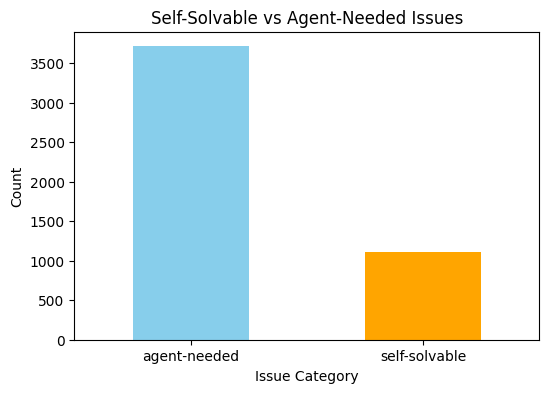

In [36]:
import matplotlib.pyplot as plt

# Count the number of self-solvable and agent-needed transcripts
issue_counts = df_cleaned['issue_category'].value_counts()

# Display the counts
print(issue_counts)

# Plot the counts using a bar chart
plt.figure(figsize=(6, 4))
issue_counts.plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Self-Solvable vs Agent-Needed Issues')
plt.xlabel('Issue Category')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


In [1]:
!pip install nltk

In [3]:
!pip install transformers

In [5]:
!pip install tf-keras

   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.7 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.7 MB ? eta -:--:--
   ------------ --------------------------- 0.5/1.7 MB 699.0 kB/s eta 0:00:02
   ------------ --------------------------- 0.5/1.7 MB 699.0 kB/s eta 0:00:02
   ------------------ --------------------- 0.8/1.7 MB 763.2 kB/s eta 0:00:02
   ------------------ --------------------- 0.8/1.7 MB 763.2 kB/s eta 0:00:02
   ------------------------ --------------- 1.0/1.7 MB 709.1 kB/s eta 0:00:01
   ------------------------------ --------- 1.3/1.7 MB 745.8 kB/s eta 0:00:01
   ------------------------------ --------- 1.3/1.7 MB 745.8 kB/s eta 0:00:01
   ---------------------------------------- 1.7/1.7 MB 773.5 kB/s eta 0:00:00


In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Assume you have a column 'issue_category' in your DataFrame that labels the issues as "self-solvable" or "agent-needed"
# Vectorize the transcript data (already done)

# Create labels (target variable)
y = df_cleaned['issue_category']  # self-solvable (0) or agent-needed (1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Train a Logistic Regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Predict on the test set
y_pred = logreg.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))


               precision    recall  f1-score   support

 agent-needed       0.87      0.99      0.93       746
self-solvable       0.92      0.52      0.66       219

     accuracy                           0.88       965
    macro avg       0.90      0.75      0.79       965
 weighted avg       0.88      0.88      0.87       965



In [38]:
# Install Hugging Face's Transformers library
# pip install transformers

from transformers import BertTokenizer, BertForSequenceClassification
from sklearn.model_selection import train_test_split
from transformers import Trainer, TrainingArguments
import torch

# Load pre-trained BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)  # binary classification

# Tokenize the transcripts (this will return tokens and attention masks)
def tokenize_data(text):
    return tokenizer(text, padding='max_length', truncation=True, return_tensors="pt")

# Tokenize the call transcripts
transcripts_tokenized = df_cleaned['call_transcript'].apply(lambda x: tokenize_data(x))

# Prepare data for BERT
X = transcripts_tokenized['input_ids']
y = torch.tensor(df_cleaned['issue_category'].values)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define training arguments
training_args = TrainingArguments(
    output_dir='./results',          
    num_train_epochs=3,              
    per_device_train_batch_size=8,  
    per_device_eval_batch_size=8,   
    warmup_steps=500,                
    weight_decay=0.01,              
    logging_dir='./logs',            
)

# Create Trainer instance
trainer = Trainer(
    model=model,                         
    args=training_args,                  
    train_dataset=X_train,         
    eval_dataset=X_test             
)

# Train the model
trainer.train()

# Evaluate the model
trainer.evaluate()


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


KeyError: 'input_ids'